## 基于栈求解迷宫问题

In [29]:
from enum import Enum

class StackNode:
    def __init__(self, element, next=None):
        self.element = element
        self.next = next

class Stack:
    def __init__(self):
        self.top = None
        
    def push(self, e):
        self.top = StackNode(e, self.top)

    def empty(self):
        return self.top == None

    def pop(self):
        if self.empty():
            raise Exception('Empty Stack')
        else:
            e = self.top.element
            self.top = self.top.next
            return e

"""
定义方向的枚举类型，便于代码阅读
"""
UP = 1
RIGHT = 2
DOWN = 3
LEFT = 4


class MazeCell:
    def __init__(self, x, y, wall = False, direction = 0, visited = False, from_cell = None):
        self.x = x
        self.y = y
        self.wall = wall
        self.direction = direction
        self.visited = visited
        self.from_cell = from_cell

    def __repr__(self):
        value = 1 if self.wall else 0
        return f'({self.x}, {self.y}, {value})'

maze_array = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

def next_try(maze, x, y):
    """
    从x，y位置，获取下一个未遍历过、需要尝试走的位置。如存在，返回对应的MazeCell和True
    否则，返回None，False
    """
    current = maze[x][y]
    for i in range(current.direction, 4):
        direction = i + 1
        if direction==UP:
            new_x, new_y = x-1, y
        elif direction==RIGHT:
            new_x, new_y = x, y+1
        elif direction==DOWN:
            new_x, new_y = x+1, y
        else:
            new_x, new_y = x, y-1   
        cell = maze[new_x][new_y]
        if not cell.wall and not cell.visited:
            current.direction = direction
            return cell, True

    # 没有找到
    return None, False
         

maze = [ [MazeCell(x, y, value==1) for y, value in enumerate(row)] for x, row in enumerate(maze_array) ]

start = maze[1][1]
out = maze[8][8]

stack = Stack()
start.visited = True
stack.push(start)

while not stack.empty():
    current = stack.pop()
    if current == out:
        break

    next_cell, found = next_try(maze, current.x, current.y)
    if found:
        next_cell.visited = True
        stack.push(current)
        stack.push(next_cell)

path = []
while not stack.empty():
    path.append(stack.pop())
path = path[::-1]
#locations.reverse()
print(path)

[(1, 1, 0), (2, 1, 0), (3, 1, 0), (4, 1, 0), (5, 1, 0), (6, 1, 0), (6, 2, 0), (6, 3, 0), (5, 3, 0), (4, 3, 0), (4, 4, 0), (4, 5, 0), (4, 6, 0), (5, 6, 0), (6, 6, 0), (7, 6, 0), (7, 7, 0), (7, 8, 0)]


## 利用matplotlib进行可视化呈现

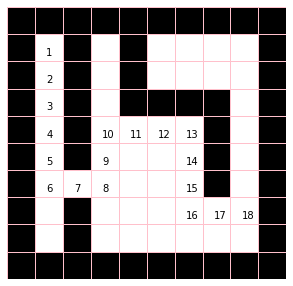

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
fig.set_size_inches(5,5) # 设置每个大小实际占据的尺寸
plt.xlim([0, 10])
plt.ylim([0, 10])
ax.axis('off')

def draw_cell(x, y, wall = False):
    fc = 'black' if wall else 'white'
    ax.add_patch(Rectangle((y, 9-x), 1, 1,
            edgecolor = 'pink',
            facecolor = fc))

def draw_visited(x, y, step):
    ax.text(y+0.4, 9-x+0.2, str(step))

# 绘制迷宫
for row in maze:
   for cell in row:
       draw_cell(cell.x, cell.y, cell.wall)

# 标记找到的路径
for idx, cell in enumerate(path):
    draw_visited(cell.x, cell.y, idx+1)       

plt.show()        
